# In the following is the influence of the mesh refinement examined and its affects to the convergence 

### The simulation was run with five meshes of different refinement levels. They will be refered to as 1 to 5. 1 being the least and 5 the most refined.


lets say here is something written 

### Direct comparison of each field variable

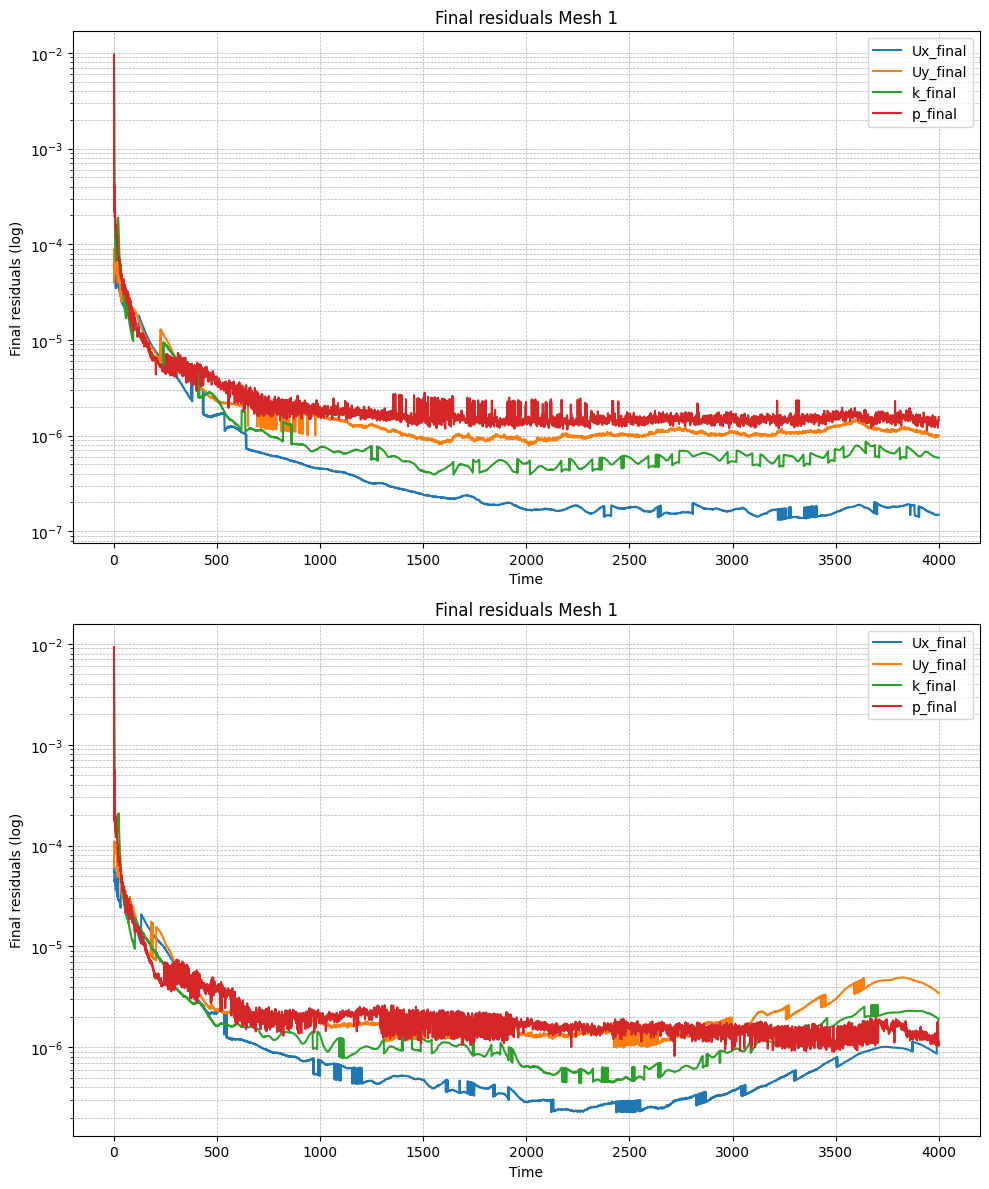

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# defining file of solverInfo 
mesh_1 = 'output/MeshConvergence/mesh_1/postProcessing/solverInfo/0/solverInfo.dat'
mesh_2 = 'output/MeshConvergence/mesh_2/postProcessing/solverInfo/0/solverInfo.dat'

# columns
colnames = [
    "Time", "U_solver", "Ux_initial", "Ux_final", "Ux_iters",
    "Uy_initial", "Uy_final", "Uy_iters", "U_converged",
    "k_solver", "k_initial", "k_final", "k_iters", "k_converged",
    "p_solver", "p_initial", "p_final", "p_iters", "p_converged"
]

# reading file
df1 = pd.read_csv(mesh_1, sep=r'\s+', skiprows=2, names=colnames)
df2 = pd.read_csv(mesh_2, sep=r'\s+', skiprows=2, names=colnames)

# plotting
plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
plt.plot(df1["Time"], df1["Ux_final"], label="Ux_final")
plt.plot(df1["Time"], df1["Uy_final"], label="Uy_final")
plt.plot(df1["Time"], df1["k_final"], label="k_final")
plt.plot(df1["Time"], df1["p_final"], label="p_final")
 
plt.xlabel("Time")
plt.ylabel("Final residuals (log)")
plt.title("Final residuals Mesh 1")
plt.yscale('log')

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()

plt.subplot(2, 1, 2)
plt.plot(df1["Time"], df2["Ux_final"], label="Ux_final")
plt.plot(df1["Time"], df2["Uy_final"], label="Uy_final")
plt.plot(df1["Time"], df2["k_final"], label="k_final")
plt.plot(df1["Time"], df2["p_final"], label="p_final")
 
plt.xlabel("Time")
plt.ylabel("Final residuals (log)")
plt.title("Final residuals Mesh 2")
plt.yscale('log')

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()

### Comparison of the residuals of each mesh plotted over time

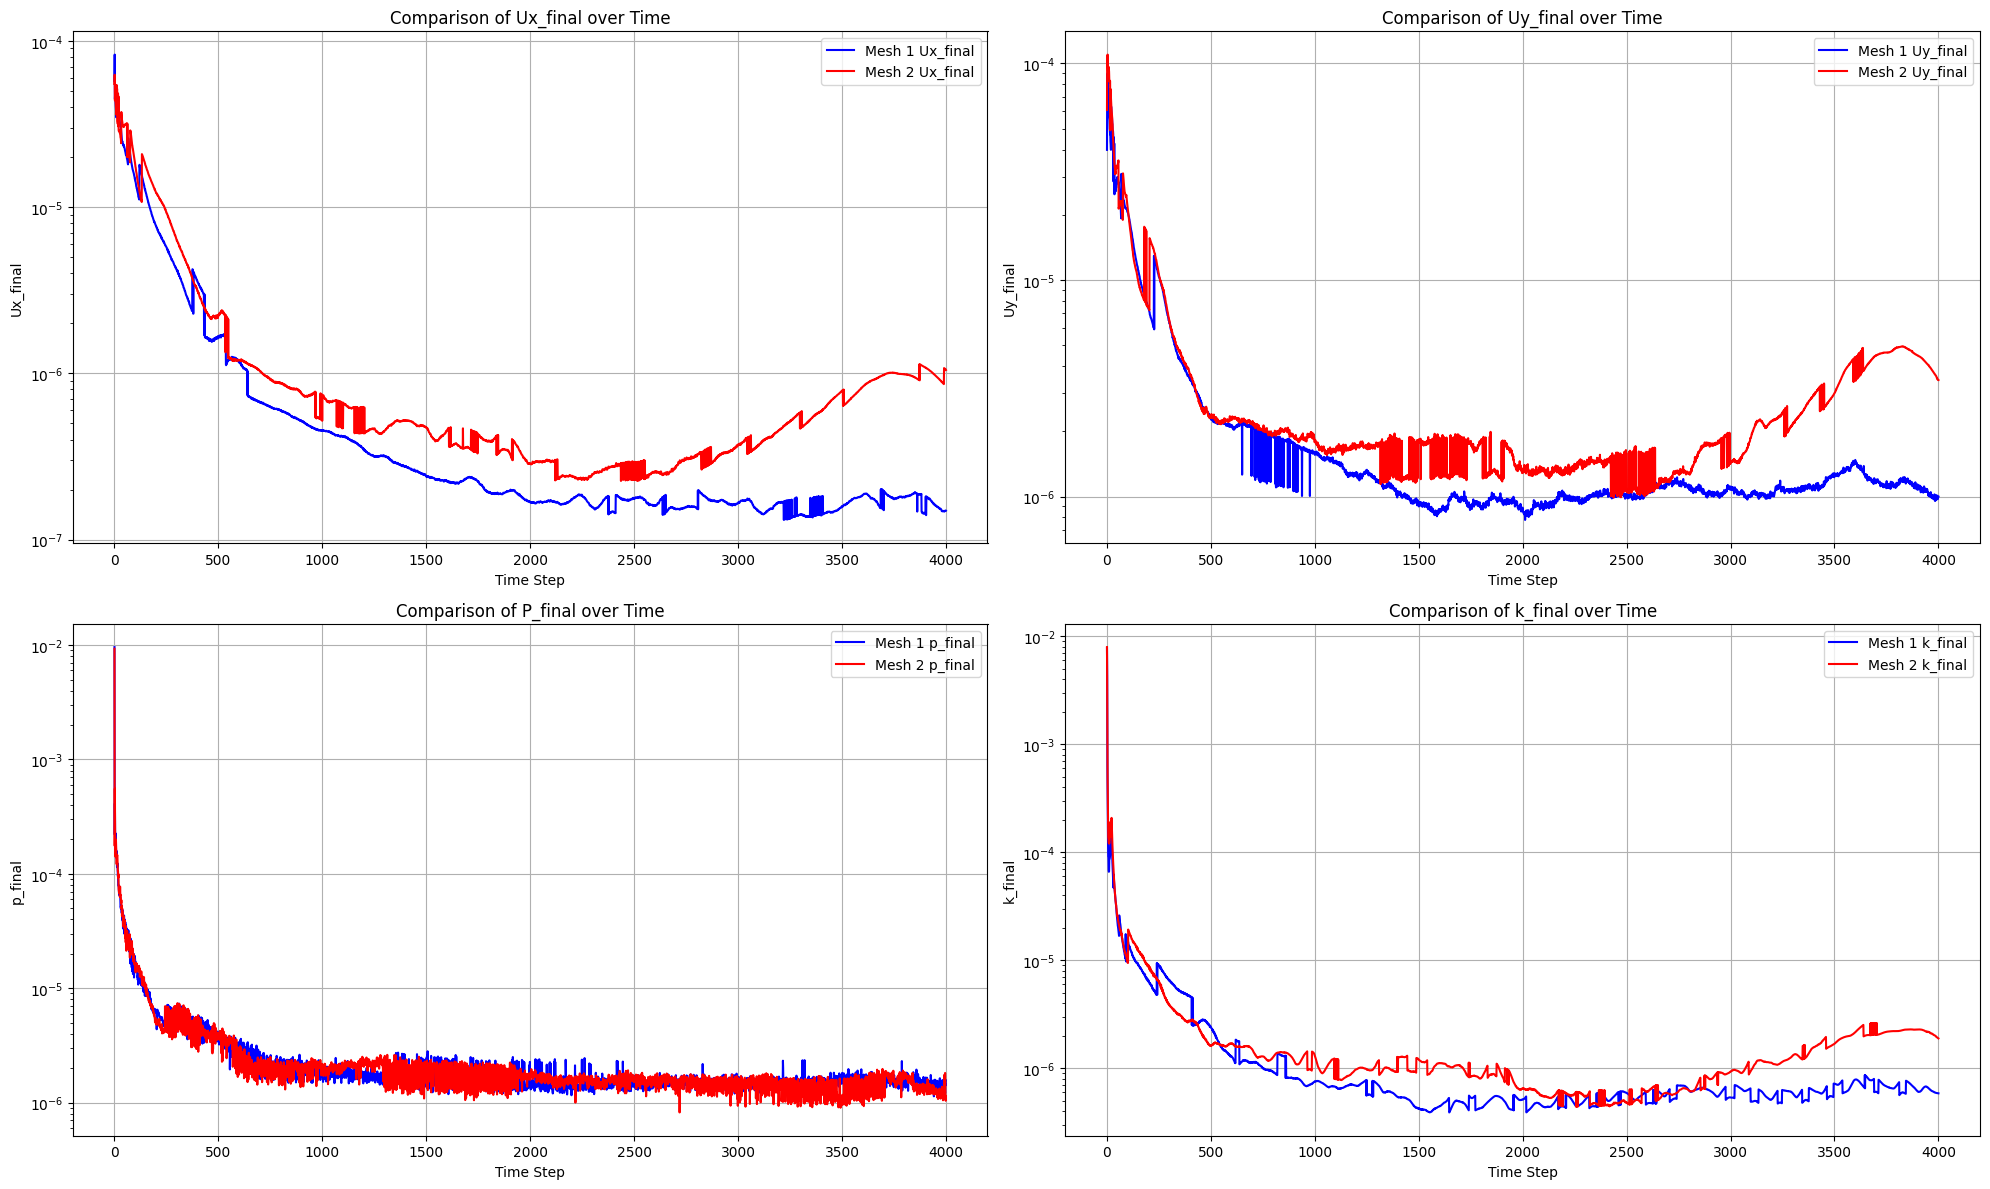

In [2]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt.plot(df1["Time"], df1["Ux_final"], label="Mesh 1 Ux_final", color='blue')
plt.plot(df2["Time"], df2["Ux_final"], label="Mesh 2 Ux_final", color='red')
plt.xlabel('Time Step')
plt.ylabel('Ux_final')
plt.title('Comparison of Ux_final over Time')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Erstelle Diagramm für Uy_final
plt.subplot(2, 2, 2)
plt.plot(df1["Time"], df1["Uy_final"], label="Mesh 1 Uy_final", color='blue')
plt.plot(df2["Time"], df2["Uy_final"], label="Mesh 2 Uy_final", color='red')
plt.xlabel('Time Step')
plt.ylabel('Uy_final')
plt.title('Comparison of Uy_final over Time')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.subplot(2, 2, 3)
plt.plot(df1["Time"], df1["p_final"], label="Mesh 1 p_final", color='blue')
plt.plot(df2["Time"], df2["p_final"], label="Mesh 2 p_final", color='red')
plt.xlabel('Time Step')
plt.ylabel('p_final')
plt.title('Comparison of P_final over Time')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.subplot(2, 2, 4)
plt.plot(df1["Time"], df1["k_final"], label="Mesh 1 k_final", color='blue')
plt.plot(df2["Time"], df2["k_final"], label="Mesh 2 k_final", color='red')
plt.xlabel('Time Step')
plt.ylabel('k_final')
plt.title('Comparison of k_final over Time')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()


plt.show()
